In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney

- Question 1- How many Movies each plataform has? How many movies from Disney does Netflix has? How many movies above 13 each plataform has?
- Question 2- What is the average IMDb ratings of a movie produced in a country?
- Question 3- How many movies were made per combination of countries
- Question 4- Numbers of movies by each 10 years
- Question 5- Average ratings of Top 5 Genres Between 2010 and 2020

In [2]:
os.listdir()

['.ipynb_checkpoints', 'Movies.ipynb', 'Movies_on_Streaming_Platforms.csv']

In [3]:
pd.set_option('display.max_rows', 20)
pd.set_option("max_rows", 20)
movie=pd.read_csv('Movies_on_Streaming_Platforms.csv')

In [4]:
movie.drop(columns='Unnamed: 0',inplace=True)

In [5]:
movie.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [6]:
movie.rename(columns={'Age':'Min_Age','Rotten Tomatoes':'RT','Prime Video':'Prime','Disney+':'Disney'}, inplace=True)

In [7]:
movie.head(2)

,ID,Title,Year,Min_Age,IMDb,RT,Netflix,Hulu,Prime,Disney,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


In [8]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         16744 non-null  int64  
 1   Title      16744 non-null  object 
 2   Year       16744 non-null  int64  
 3   Min_Age    7354 non-null   object 
 4   IMDb       16173 non-null  float64
 5   RT         5158 non-null   object 
 6   Netflix    16744 non-null  int64  
 7   Hulu       16744 non-null  int64  
 8   Prime      16744 non-null  int64  
 9   Disney     16744 non-null  int64  
 10  Type       16744 non-null  int64  
 11  Directors  16018 non-null  object 
 12  Genres     16469 non-null  object 
 13  Country    16309 non-null  object 
 14  Language   16145 non-null  object 
 15  Runtime    16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


In [9]:
#Where are tem nan values
movie.columns[movie.isna().any()].tolist()

['Min_Age',
 'IMDb',
 'RT',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [10]:
movie.duplicated().any()

False

#### Age

In [11]:
# replace all to 0
movie.Min_Age.replace(to_replace='all', value=0, inplace=True)

In [12]:
#strip (+) sign in Age for mean value
movie.Min_Age=[int(x.strip('+')) if type(x)==str else x for x in movie.Min_Age]

In [13]:
movie.Min_Age.mean()

12.809491433233614

In [14]:
#filter 1: for all movies from Disney, the min Age is 0

movie.loc[movie.Min_Age.isnull() & movie.Disney, 'Min_Age']=1

In [15]:
movie.Min_Age.isna().any()

True

In [16]:
movie.Min_Age.unique()

array([13., 18.,  7., nan,  0., 16.,  1.])

In [17]:
# filter 2: else, fullfil with the mean age
movie.loc[movie.Min_Age.isnull(), 'Min_Age']=13

In [18]:
movie.Min_Age.isnull().any()

False

In [19]:
movie.Min_Age.mean()

12.870461060678451

In [20]:
movie['Min_Age']=movie.Min_Age.astype('int64')

In [21]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         16744 non-null  int64  
 1   Title      16744 non-null  object 
 2   Year       16744 non-null  int64  
 3   Min_Age    16744 non-null  int64  
 4   IMDb       16173 non-null  float64
 5   RT         5158 non-null   object 
 6   Netflix    16744 non-null  int64  
 7   Hulu       16744 non-null  int64  
 8   Prime      16744 non-null  int64  
 9   Disney     16744 non-null  int64  
 10  Type       16744 non-null  int64  
 11  Directors  16018 non-null  object 
 12  Genres     16469 non-null  object 
 13  Country    16309 non-null  object 
 14  Language   16145 non-null  object 
 15  Runtime    16152 non-null  float64
dtypes: float64(2), int64(8), object(6)
memory usage: 2.0+ MB


In [22]:
movie.columns[movie.isna().any()]

Index(['IMDb', 'RT', 'Directors', 'Genres', 'Country', 'Language', 'Runtime'], dtype='object')

In [23]:
movie.head()

,ID,Title,Year,Min_Age,IMDb,RT,Netflix,Hulu,Prime,Disney,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


#### RT

In [24]:
movie['RT']=movie.RT.astype('str')
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         16744 non-null  int64  
 1   Title      16744 non-null  object 
 2   Year       16744 non-null  int64  
 3   Min_Age    16744 non-null  int64  
 4   IMDb       16173 non-null  float64
 5   RT         16744 non-null  object 
 6   Netflix    16744 non-null  int64  
 7   Hulu       16744 non-null  int64  
 8   Prime      16744 non-null  int64  
 9   Disney     16744 non-null  int64  
 10  Type       16744 non-null  int64  
 11  Directors  16018 non-null  object 
 12  Genres     16469 non-null  object 
 13  Country    16309 non-null  object 
 14  Language   16145 non-null  object 
 15  Runtime    16152 non-null  float64
dtypes: float64(2), int64(8), object(6)
memory usage: 2.0+ MB


In [25]:
#strip (%) sign in Age for mean value
movie['RT']=movie.RT.str.strip('%')

In [26]:
movie['RT']=movie.RT.astype('float')

In [27]:
movie.RT.mean()

65.42846064366033

## Question 1- How many Movies each plataform has? How many movies from Disney does Netflix has? How many movies above 13 each plataform has?

In [82]:
netflix=movie.Netflix.sum()
netflix

3560

In [76]:
hulu=movie.Hulu.sum()

In [75]:
prime=movie.Prime.sum()

In [74]:
disney=movie.Disney.sum()

In [109]:
fig = px.pie(names=('Netflix','Hulu','Prime','Disney'), values=(netflix,hulu,prime,disney))
fig.update_traces(rotation=180, pull=[0.03,0.1,0.03,0.1],textinfo="value+percent", title='Movies per plataform')
fig.update_layout(showlegend=True)
fig.show()

- __How many movies from Disney does Netflix have?__

In [110]:
movie.loc[(movie.Netflix==1)& (movie.Disney==1)]

,ID,Title,Year,Min_Age,IMDb,RT,Netflix,Hulu,Prime,Disney,...,Directors,Genres,Country,Language,Runtime,Horror,Adventure,Western,Action,by_10y
95,96,Saving Mr. Banks,2013,13,7.5,79.0,1,0,0,1,...,John Lee Hancock,"Biography,Comedy,Drama","United States,United Kingdom,Australia",English,125.0,0,0,0,0,2010-2020
103,104,Amy,2015,18,7.8,95.0,1,0,1,1,...,NaN,Drama,United States,English,60.0,0,0,0,0,2010-2020
122,123,Bolt,2008,7,6.8,89.0,1,0,0,1,...,"Byron Howard,Chris Williams","Animation,Adventure,Comedy,Drama,Family",United States,English,96.0,0,1,0,0,2000-09
125,126,The Princess and the Frog,2009,0,7.1,85.0,1,0,0,1,...,"Ron Clements,John Musker","Animation,Adventure,Comedy,Family,Fantasy,Musi...",United States,"English,French",97.0,0,1,0,0,2000-09
150,151,Miracle,2004,7,7.5,81.0,1,0,0,1,...,Gavin O'Connor,"Biography,Drama,History,Sport","Canada,United States",English,135.0,0,0,0,0,2000-09
482,483,White Fang,2018,7,6.9,88.0,1,0,0,1,...,Randal Kleiser,"Adventure,Drama",United States,English,107.0,0,1,0,0,2010-2020
724,725,Chicken Little,2005,0,5.7,37.0,1,0,0,1,...,Mark Dindal,"Animation,Adventure,Comedy,Family,Fantasy,Sci-Fi",United States,English,81.0,0,1,0,0,2000-09
1647,1648,Diana: In Her Own Words,2017,1,7.9,NaN,1,0,0,1,...,"Tom Jennings,David Tillman","Documentary,Biography",United Kingdom,English,112.0,0,0,0,0,2010-2020
1761,1762,The Little Mermaid,2018,7,4.2,20.0,1,0,0,1,...,"Ron Clements,John Musker","Animation,Family,Fantasy,Musical,Romance",United States,"English,French",83.0,0,0,0,0,2010-2020
1776,1777,Zapped,2014,0,5.1,NaN,1,1,0,1,...,Peter DeLuise,"Comedy,Family,Fantasy","Canada,United States",English,102.0,0,0,0,0,2010-2020


- __How many movies above 13 each plataform has?__

In [119]:
more13=movie.loc[movie.Min_Age>13]
more13.head(2)

,ID,Title,Year,Min_Age,IMDb,RT,Netflix,Hulu,Prime,Disney,...,Directors,Genres,Country,Language,Runtime,Horror,Adventure,Western,Action,by_10y
1,2,The Matrix,1999,18,8.7,87.0,1,0,0,0,...,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,0,0,1,90-99
4,5,"The Good, the Bad and the Ugly",1966,18,8.8,97.0,1,0,1,0,...,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0,60-69


In [133]:
#x=plataform
#y=number
more13N=more13.loc[(movie.Netflix==1)].Min_Age.count()
more13H=more13.loc[(movie.Hulu==1)].Min_Age.count()
more13P=more13.loc[(movie.Prime==1)].Min_Age.count()
more13D=more13.loc[(movie.Disney==1)].Min_Age.count()
#labels=['Netflix','Hulu','Prime','Disney']
fig = px.bar(x=('Netflix','Hulu','Prime','Disney'), y=(more13N,more13H,more13P,more13D),height=400)
fig.update_layout(yaxis=dict(title='Numbers of Movies above 13'), xaxis=dict(title=''))
fig


## Question 2- What is the average IMDb ratings of a movie produced in a country?

In [28]:
movie.IMDb.isna().any().sum()

1

In [29]:
movie.IMDb.mean()

5.902751499412594

In [30]:
movie.loc[movie.IMDb.isnull(), 'IMDb']=movie.IMDb.mean()

In [31]:
movie.IMDb.isna().any()

False

In [32]:
imd_count=movie.groupby(['Country'], as_index=False)[['IMDb']].mean().sort_values('IMDb',ascending = False).reset_index(drop=True).rename(columns={'Country':'Countries_comb'})

In [33]:
imd_count.head()

,Countries_comb,IMDb
0,"United Kingdom,United States,New Zealand",9.3
1,"United Kingdom,Bosnia and Herzegovina",9.1
2,"United States,Portugal,Germany,Ecuador",8.9
3,"United States,Libya,Isle Of Man,United Kingdom...",8.9
4,"United States,Syria",8.9


## Question 3- How many movies were made per combination of countries

In [34]:
movie.Genres.loc[movie['Genres'].isna()]

518      NaN
539      NaN
962      NaN
1200     NaN
1565     NaN
        ... 
16204    NaN
16207    NaN
16208    NaN
16209    NaN
16211    NaN
Name: Genres, Length: 275, dtype: object

In [35]:
movie.Genres.replace(to_replace=np.nan, value='Not informed', inplace=True)

In [36]:
movie.Country.replace(to_replace=np.nan, value='Not informed', inplace=True)

In [37]:
movie.columns[movie.isna().any()]

Index(['RT', 'Directors', 'Language', 'Runtime'], dtype='object')

In [38]:
movie_count=movie.groupby(['Country'],as_index= False)[['ID']].count().rename(columns={'ID':'Movie_count'})

In [39]:
movie_count=movie_count[movie_count.Country!='Not informed']


In [40]:
movie_count=movie_count.sort_values('Movie_count',ascending=False).reset_index(drop=True)

In [41]:
top10movie_count=movie_count.head(10)

In [79]:
names=[country for country in movie_count]

fig = px.pie(top10movie_count,names='Country', values='Movie_count')
fig.update_traces(rotation=180, pull=[0.1,0.03,0.03,0.03,0.03],textinfo="label+percent", title='Movie Count per Country')
fig.update_layout(showlegend=False)
fig.show()

In [43]:
genre=movie.Genres.str.split(',')
genre

0        [Action, Adventure, Sci-Fi, Thriller]
1                             [Action, Sci-Fi]
2                  [Action, Adventure, Sci-Fi]
3                  [Adventure, Comedy, Sci-Fi]
4                                    [Western]
                         ...                  
16739        [Comedy, Family, Fantasy, Horror]
16740                 [Comedy, Family, Sci-Fi]
16741                            [Documentary]
16742                            [Documentary]
16743             [Documentary, Short, Family]
Name: Genres, Length: 16744, dtype: object

In [44]:
# https://stackoverflow.com/questions/10106901/elegant-find-sub-list-in-list

In [45]:
def horror(data):
    if list(filter(lambda x: x in 'Horror', data)):
        return 1
    else:
        return 0
    
def action(data):
    if list(filter(lambda x: x in 'Action', data)):
        return 1
    else:
        return 0
def adventure(data):
    if list(filter(lambda x: x in 'Adventure', data)):
        return 1
    else:
        return 0
def western(data):
    if list(filter(lambda x: x in 'Western', data)):
        return 1
    else:
        return 0


In [46]:
columns= ['Action', 'Adventure', 'Western', 'Animation', 'Biography', 'Drama', 'Crime', 'Comedy', 'Documentary', 'Family', 'Horror','Thriller', 'Mystery', 'nothing', 'Fantasy', 'Romance', 'Short',
       'Sci-Fi', 'Talk-Show', 'Sport', 'Reality-TV', 'Musical', 'Music',
       'War', 'News', 'History', 'Game-Show', 'Film-Noir']

In [47]:
len(columns)

28

In [48]:
movie['Horror']=genre.apply(horror)
movie['Adventure']=genre.apply(adventure)
movie['Western']=genre.apply(western)

In [49]:
movie['Action']=genre.apply(action)

In [50]:
movie.head()

,ID,Title,Year,Min_Age,IMDb,RT,Netflix,Hulu,Prime,Disney,Type,Directors,Genres,Country,Language,Runtime,Horror,Adventure,Western,Action
0,1,Inception,2010,13,8.8,87.0,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,1,0,1
1,2,The Matrix,1999,18,8.7,87.0,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,0,0,1
2,3,Avengers: Infinity War,2018,13,8.5,84.0,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,1,0,1
3,4,Back to the Future,1985,7,8.5,96.0,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,0,1,0,0
4,5,"The Good, the Bad and the Ugly",1966,18,8.8,97.0,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0


## Question 4- Numbers of movies by each 10 years

In [51]:
movie.Year.min()

1902

In [52]:
movie.Year.max()

2020

In [53]:
year_bins=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2021]

In [54]:
dis_year=pd.cut(movie.Year, year_bins, right=False)
dis_year.value_counts()

[2010, 2021)    9764
[2000, 2010)    2940
[1990, 2000)    1002
[1970, 1980)     769
[1980, 1990)     750
[1940, 1950)     386
[1960, 1970)     375
[1950, 1960)     359
[1930, 1940)     345
[1920, 1930)      39
[1910, 1920)      14
[1900, 1910)       1
Name: Year, dtype: int64

In [55]:
movie['by_10y']=dis_year
movie.head(2)

,ID,Title,Year,Min_Age,IMDb,RT,Netflix,Hulu,Prime,Disney,...,Directors,Genres,Country,Language,Runtime,Horror,Adventure,Western,Action,by_10y
0,1,Inception,2010,13,8.8,87.0,1,0,0,0,...,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,1,0,1,"[2010, 2021)"
1,2,The Matrix,1999,18,8.7,87.0,1,0,0,0,...,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,0,0,1,"[1990, 2000)"


In [56]:
group_year=['00-09','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','2000-09','2010-2020']

In [57]:
by_10=pd.cut(movie.Year, year_bins,labels=group_year,right=False)

In [58]:
movie['by_10y']=by_10
movie.head(2)

,ID,Title,Year,Min_Age,IMDb,RT,Netflix,Hulu,Prime,Disney,...,Directors,Genres,Country,Language,Runtime,Horror,Adventure,Western,Action,by_10y
0,1,Inception,2010,13,8.8,87.0,1,0,0,0,...,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,1,0,1,2010-2020
1,2,The Matrix,1999,18,8.7,87.0,1,0,0,0,...,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,0,0,1,90-99


In [59]:
movie['by_10y']=movie.by_10y.astype('object')
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         16744 non-null  int64  
 1   Title      16744 non-null  object 
 2   Year       16744 non-null  int64  
 3   Min_Age    16744 non-null  int64  
 4   IMDb       16744 non-null  float64
 5   RT         5158 non-null   float64
 6   Netflix    16744 non-null  int64  
 7   Hulu       16744 non-null  int64  
 8   Prime      16744 non-null  int64  
 9   Disney     16744 non-null  int64  
 10  Type       16744 non-null  int64  
 11  Directors  16018 non-null  object 
 12  Genres     16744 non-null  object 
 13  Country    16744 non-null  object 
 14  Language   16145 non-null  object 
 15  Runtime    16152 non-null  float64
 16  Horror     16744 non-null  int64  
 17  Adventure  16744 non-null  int64  
 18  Western    16744 non-null  int64  
 19  Action     16744 non-null  int64  
 20  by_10y

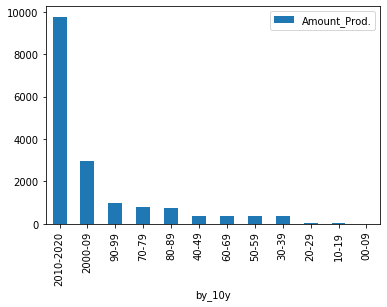

In [60]:
prod_by10=movie.groupby(['by_10y'])[['ID']].count().sort_values('ID', ascending=False).rename(columns={'ID':'Amount_Prod.'})
prod_by10.plot.bar()
plt.show()

In [61]:
by_year = movie.groupby('Year')['ID'].count().reset_index().rename(columns = {'ID':'MovieCount'})
fig = px.bar(by_year, x='Year', y='MovieCount', color='MovieCount', height=600)
fig.show()

## Question 5- Average ratings of Top 5 Genres Between 2010 and 2020

In [62]:
movie.columns

Index(['ID', 'Title', 'Year', 'Min_Age', 'IMDb', 'RT', 'Netflix', 'Hulu',
       'Prime', 'Disney', 'Type', 'Directors', 'Genres', 'Country', 'Language',
       'Runtime', 'Horror', 'Adventure', 'Western', 'Action', 'by_10y'],
      dtype='object')

In [63]:
top10=movie[movie.Genres!='Not informed']
top10=top10.Genres.value_counts().head(10)
top10

Drama                   1341
Documentary             1229
Comedy                  1040
Comedy,Drama             446
Horror                   436
Drama,Romance            397
Comedy,Drama,Romance     333
Horror,Thriller          297
Comedy,Romance           289
Drama,Thriller           222
Name: Genres, dtype: int64

In [64]:
top10_genre=['Drama','Documentary','Comedy','Comedy,Drama','Horror','Drama,Romance','Comedy,Drama,Romance','Horror,Thriller','Comedy,Romance','Drama,Thriller']

In [65]:
top10_table= movie.loc[:,['Year','Genres','IMDb']]

In [66]:
top10_table['AvgRating']=top10_table.groupby(['Genres','Year'])[['IMDb']].transform('mean')
top10_table

,Year,Genres,IMDb,AvgRating
0,2010,"Action,Adventure,Sci-Fi,Thriller",8.800000,7.500000
1,1999,"Action,Sci-Fi",8.700000,6.100000
2,2018,"Action,Adventure,Sci-Fi",8.500000,6.133333
3,1985,"Adventure,Comedy,Sci-Fi",8.500000,8.500000
4,1966,Western,8.800000,7.700000
...,...,...,...,...
16739,1980,"Comedy,Family,Fantasy,Horror",6.200000,6.200000
16740,2001,"Comedy,Family,Sci-Fi",4.700000,4.700000
16741,2013,Documentary,5.700000,6.676580
16742,2017,Documentary,6.600000,6.619725


In [67]:
table = top10_table[(top10_table.Year>2009) & (top10_table.Year<=2020)]
table = table.loc[table['Genres'].isin(top10_genre)].sort_values('Year')
table

,Year,Genres,IMDb,AvgRating
6760,2010,Comedy,7.3,5.927500
9950,2010,Documentary,6.9,6.698411
9998,2010,Drama,6.6,6.141860
10038,2010,Documentary,5.1,6.698411
5304,2010,"Comedy,Romance",7.3,5.733333
...,...,...,...,...
435,2020,Drama,6.1,6.663886
7816,2020,Documentary,4.9,6.745056
1545,2020,Comedy,7.2,6.554058
1258,2020,Comedy,6.7,6.554058


In [68]:
fig=px.bar(table,x='Genres', y='AvgRating', animation_frame='Year', animation_group='Genres', color='Genres', hover_name='Genres', range_y=[0,10])
fig.update_layout(showlegend=False)
fig.show()